In [1]:
import torch 
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
soft = torch.nn.Softmax(dim=1)
sig = torch.nn.Sigmoid()
tanh= torch.nn.Tanh()

1. hihello

In [6]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]
txt_x[:5], txt_y[:5]

(['h', 'i', '?', 'h', 'e'], ['i', '?', 'h', 'e', 'l'])

(1) torch.nn.RNN()을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라.
- 교수님이 올려주신 것과 매핑이 다릅니다..!

In [7]:
def make_mapping(txt):
    mapping = {}
    idx = 0
    for chr in txt:
        if chr not in mapping.keys():
            mapping[chr] = idx
            idx+=1
    return mapping
mapping = make_mapping(txt)
mapping

{'h': 0, 'i': 1, '?': 2, 'e': 3, 'l': 4, 'o': 5, '!': 6}

In [8]:
def int_encoding(txt,mapping):
    return [mapping[chr] for chr in txt]
x = torch.nn.functional.one_hot(torch.tensor(int_encoding(txt_x,mapping))).float().to("cuda")
y = torch.nn.functional.one_hot(torch.tensor(int_encoding(txt_y,mapping))).float().to("cuda")
print(x[:5],y[:5],x.dtype,y.dtype,x.shape,y.shape)

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]], device='cuda:0') tensor([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.]], device='cuda:0') torch.float32 torch.float32 torch.Size([999, 7]) torch.Size([999, 7])


In [ ]:
torch.manual_seed(5)
net = torch.nn.RNN(7,4).to("cuda")
linr_h2o = torch.nn.Linear(4,7).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(net.parameters())+list(linr_h2o.parameters()),lr=0.1)

In [ ]:
h_0 = torch.zeros((1,4)).to("cuda")
for epoch in range(500):
    #1 hidden,out
    hidden,h_T = net(x,h_0)
    #print(hidden.shape,h_T.shape)
    out = linr_h2o(hidden)
    #2 loss
    loss = loss_fn(out,y)
    if epoch % 100 == 0:
        print(loss)
    #3 derivative
    loss.backward()
    #4 update
    optimizer.step()
    optimizer.zero_grad()

tensor(2.0413, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0055, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0025, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0014, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0010, device='cuda:0', grad_fn=<DivBackward1>)


([<matplotlib.axis.XTick at 0x1a949f603a0>,
 [Text(0, 1, 'h'),
  Text(1, 1, 'i'),
  Text(2, 1, '?'),
  Text(3, 1, 'e'),
  Text(4, 1, 'l'),
  Text(5, 1, 'o'),
  Text(6, 1, '!')])

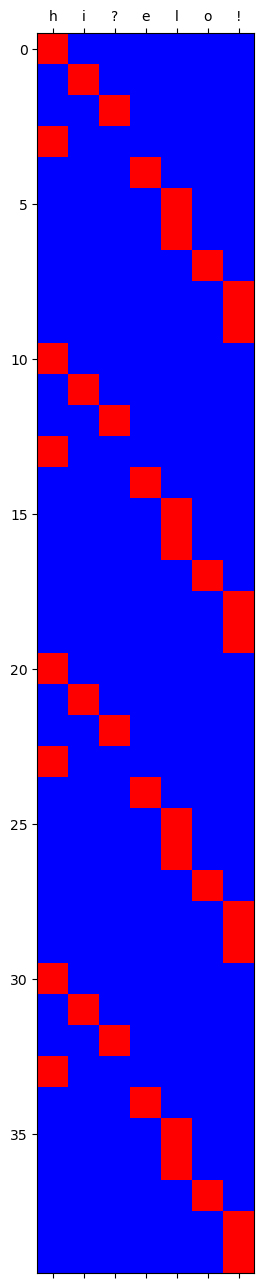

In [ ]:
h_0 = torch.zeros((1,4)).to("cuda")
hidden,h_T = net(x,h_0)
out = linr_h2o(hidden)
yhat = soft(out)
plt.matshow(yhat.to("cpu").data[-40:],cmap="bwr")
plt.xticks(range(7),labels=['h','i','?','e','l','o','!'])

(2) torch.nn.RNNCell()을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라.

In [ ]:
torch.manual_seed(5)
rnncell = torch.nn.RNNCell(7,4).to("cuda")
linr_h2o = torch.nn.Linear(4,7).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(rnncell.parameters()) + list(linr_h2o.parameters()),lr=0.1)

In [ ]:
T = len(x)
for epoch in range(500):
    h_t = torch.zeros((1,4)).to("cuda")
    loss = 0.0
    for t in range(T):
        x_t,y_t = x[[t]],y[[t]]
        #1 hidden,out
        h_t = rnncell(x_t,h_t)
        o_t = linr_h2o(h_t)
        #2 loss at timestep t
        l_t = loss_fn(o_t,y_t)
        loss += l_t
    loss = loss/T
    if epoch % 100 == 0:
        print(loss)
    #3 derivative
    loss.backward()
    #4 update and clean
    optimizer.step()
    optimizer.zero_grad()


tensor(2.0413, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<DivBackward0>)


In [ ]:
T = len(x)
hidden = torch.zeros((T,4)).to("cuda")
hidden[[0]] = rnncell(x[[0]],torch.zeros((1,4)).to("cuda"))
for t in range(1,T):
    x_t = x[[t]]
    #print(x_t.shape)
    hidden[[t]] = rnncell(x_t,hidden[[t-1]])

([<matplotlib.axis.XTick at 0x1a94ffb9a90>,
 [Text(0, 1, 'h'),
  Text(1, 1, 'i'),
  Text(2, 1, '?'),
  Text(3, 1, 'e'),
  Text(4, 1, 'l'),
  Text(5, 1, 'o'),
  Text(6, 1, '!')])

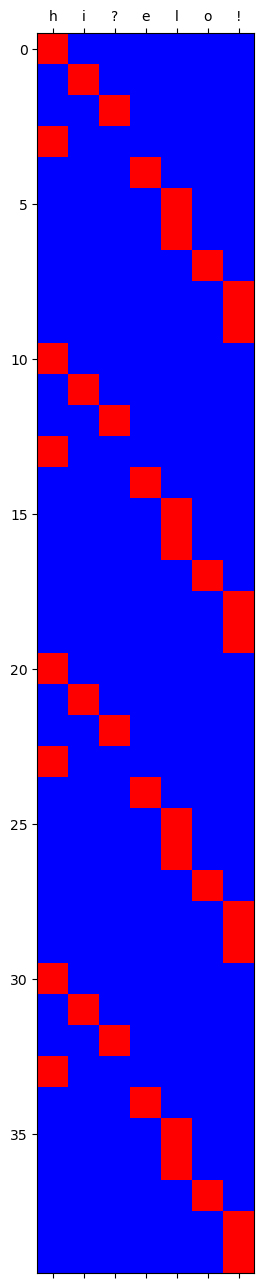

In [ ]:
yhat = soft(linr_h2o(hidden))
plt.matshow(yhat.to("cpu").data[-40:],cmap="bwr")
plt.xticks(range(7),labels=['h','i','?','e','l','o','!'])


(3) torch.nn.Module을 상속받은 클래스를 정의하고 (2)의 결과와 동일한 적합값이 나오는 신경망을 설계한 뒤 학습하라. (초기값을 적절하게 설정할 것)

In [ ]:
class Rnn_cell(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.linri2h = torch.nn.Linear(input_size,hidden_size)
        self.linrh2h = torch.nn.Linear(hidden_size,hidden_size) 
        self.tanh = torch.nn.Tanh()
    def forward(self,x,h_t):
        return self.tanh(self.linri2h(x) + self.linrh2h(h_t))

In [ ]:
#동일한 적합값이 나오도록 신경망을 학습시키기 위해서 RNNCell의 파라미터를 가져왔습니다.
torch.manual_seed(5)
rnncell = torch.nn.RNNCell(7,4).to("cuda")
linr_h2o = torch.nn.Linear(4,7).to("cuda")
rnncell.weight_hh.data

tensor([[-0.2361, -0.1094, -0.3339, -0.2364],
        [-0.4558, -0.0116,  0.2965,  0.2432],
        [ 0.4697, -0.4391, -0.0615,  0.4868],
        [ 0.0819, -0.1410, -0.4503,  0.2327]], device='cuda:0')

In [ ]:
torch.manual_seed(5)
rnn_cell = Rnn_cell(7,4).to("cuda")
#파라미터 초기화(from torch.nn.RNNCell)
rnn_cell.linri2h.weight.data = rnncell.weight_ih.data
rnn_cell.linri2h.bias.data = rnncell.bias_ih.data
rnn_cell.linrh2h.weight.data = rnncell.weight_hh.data
rnn_cell.linrh2h.bias.data = rnncell.bias_hh.data
linr_h2o = torch.nn.Linear(4,7).to("cuda")

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(rnn_cell.parameters())+list(linr_h2o.parameters()),lr=0.1)

In [ ]:
T = len(x)
for epoch in range(500):
    h_t = torch.zeros((1,4)).to("cuda")
    loss = 0.0
    for t in range(T):
        x_t,y_t = x[[t]],y[[t]]
        #1 hidden,out
        h_t = rnn_cell(x_t,h_t) #rnncell => rnn_cell
        o_t = linr_h2o(h_t)
        #2 loss at timestep t
        l_t = loss_fn(o_t,y_t)
        loss += l_t
    loss = loss/T
    if epoch % 100 == 0:
        print(loss)
    #3 derivative
    loss.backward()
    #4 update and clean
    optimizer.step()
    optimizer.zero_grad()

tensor(2.0413, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<DivBackward0>)


In [ ]:
T = len(x)
hidden = torch.zeros((T,4)).to("cuda")
hidden[[0]] = rnn_cell(x[[0]],torch.zeros((1,4)).to("cuda")) #rnncell => rnn_cell
for t in range(1,T):
    x_t = x[[t]]
    #print(x_t.shape)
    hidden[[t]] = rnn_cell(x_t,hidden[[t-1]]) #rnncell => rnn_cell

([<matplotlib.axis.XTick at 0x1a954939c70>,
 [Text(0, 1, 'h'),
  Text(1, 1, 'i'),
  Text(2, 1, '?'),
  Text(3, 1, 'e'),
  Text(4, 1, 'l'),
  Text(5, 1, 'o'),
  Text(6, 1, '!')])

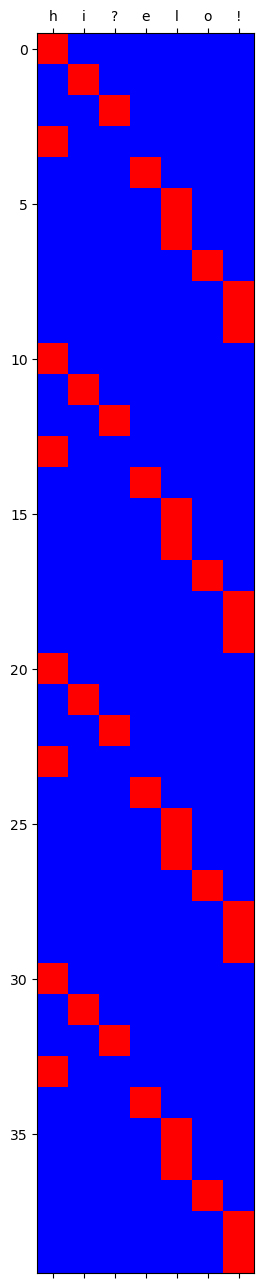

In [ ]:
yhat = soft(linr_h2o(hidden))
plt.matshow(yhat.to("cpu").data[-40:],cmap="bwr")
plt.xticks(range(7),labels=['h','i','?','e','l','o','!'])


(4) torch.nn.LSTM()을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라.

In [9]:
torch.manual_seed(5)
lstm = torch.nn.LSTM(7,8).to("cuda")
linr_h2o = torch.nn.Linear(8,7).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstm.parameters()) + list(linr_h2o.parameters()),lr=0.1)

In [10]:
h_0 = torch.zeros((1,8)).to("cuda")
c_0 = torch.zeros((1,8)).to("cuda")
for epoch in range(500):
    #1 hidden,output
    hidden,(h_T,c_T)= lstm(x,(h_0,c_0))
    out = linr_h2o(hidden)
    #2 loss
    loss = loss_fn(out,y)
    if epoch % 100 == 0:
      print(loss)
    #3 derivative
    loss.backward()
    #4 update & clean
    optimizer.step()
    optimizer.zero_grad()

tensor(1.8939, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0009, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0003, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.0002, device='cuda:0', grad_fn=<DivBackward1>)


([<matplotlib.axis.XTick at 0x7f68d01dd510>,
 [Text(0, 1, 'h'),
  Text(0, 1, 'i'),
  Text(0, 1, '?'),
  Text(0, 1, 'e'),
  Text(0, 1, 'l'),
  Text(0, 1, 'o'),
  Text(0, 1, '!')])

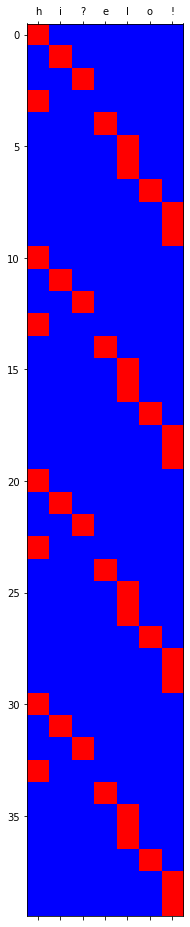

In [11]:
h_0 = c_0 = torch.zeros((1,8)).to("cuda")
hidden,(_,_) = lstm(x,(h_0,c_0))
out = linr_h2o(hidden)
yhat = soft(out)
plt.matshow(yhat.to("cpu").data[-40:],cmap="bwr")
plt.xticks(range(7),labels=['h','i','?','e','l','o','!'])


(5) torch.nn.LSTMCell()을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라.

In [12]:
torch.manual_seed(5)
lstmcell = torch.nn.LSTMCell(7,8).to("cuda")
linr_h2o = torch.nn.Linear(8,7).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstmcell.parameters()) + list(linr_h2o.parameters()),lr=0.1)

In [13]:
T = len(x)
for epoch in range(500):
  h_t = c_t = torch.zeros((1,8)).to("cuda")
  loss = 0.0
  for t in range(T):
    x_t,y_t = x[[t]],y[[t]]
    #1 hidden,out
    h_t,c_t = lstmcell(x_t,(h_t,c_t))
    out = linr_h2o(h_t)
    #2 loss
    l_t = loss_fn(out,y_t)
    loss += l_t
  loss = loss/T
  if epoch % 100 == 0:
    print(loss)
  #3derivative
  loss.backward()
  #4 update & clean
  optimizer.step()
  optimizer.zero_grad()

tensor(1.8939, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>)


In [14]:
T = len(x)
hidden = torch.zeros((T,8)).to("cuda")
cell = torch.zeros((T,8)).to("cuda")

h_0 = c_0 = torch.zeros((1,8)).to("cuda") # t = 0일때의 h,c값 초기화
hidden[[0]],cell[[0]] = lstmcell(x[[0]],(h_0,c_0)) # t = 1일때의 h_1,c_t먼저 기록
for t in range(1,T): #t = 2일때부터 기록
  x_t = x[[t]]
  hidden[[t]],cell[[t]] = lstmcell(x_t,(hidden[[t-1]],cell[[t-1]]))

([<matplotlib.axis.XTick at 0x7f68d010abd0>,
 [Text(0, 1, 'h'),
  Text(0, 1, 'i'),
  Text(0, 1, '?'),
  Text(0, 1, 'e'),
  Text(0, 1, 'l'),
  Text(0, 1, 'o'),
  Text(0, 1, '!')])

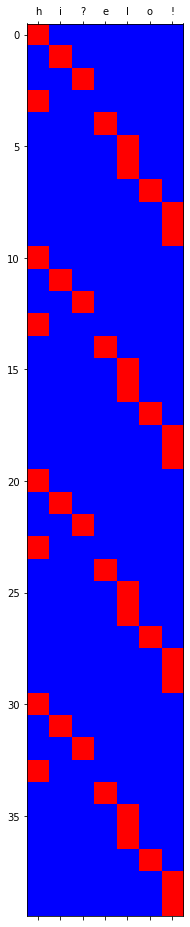

In [15]:
out = linr_h2o(hidden)
yhat = soft(out)
plt.matshow(yhat.to("cpu").data[-40:],cmap="bwr")
plt.xticks(range(7),labels=['h','i','?','e','l','o','!'])


(6) (5)의 결과와 동일한 적합값을 출력하는 신경망을 직접설계한 뒤 학습시켜라. (초기값을 적절하게 설정할 것)

version1 - class사용

In [16]:
class LSTM_cell(nn.Module):
  def __init__(self,input_size,hidden_size):
    super().__init__()
    self.linri2h = torch.nn.Linear(input_size,hidden_size * 4)
    self.linrh2h = torch.nn.Linear(hidden_size,hidden_size * 4)
    self.tanh = torch.nn.Tanh()
    self.sig = torch.nn.Sigmoid()
    self.hidden_size = hidden_size
  def forward(self,x,h_t,c_t):
    ifgo = self.linri2h(x) + self.linrh2h(h_t)
    i_t = self.sig(ifgo[:,0:self.hidden_size])
    f_t = self.sig(ifgo[:,self.hidden_size:self.hidden_size*2])
    g_t = self.tanh(ifgo[:,self.hidden_size*2:self.hidden_size*3])
    o_t  = self.sig(ifgo[:,self.hidden_size*3:self.hidden_size*4])
    #print(ifgo.shape,i_t.shape,f_t.shape,g_t.shape,o_t.shape)
    c_t = f_t * c_t + i_t * g_t
    h_t = o_t * self.tanh(c_t)
    return h_t,c_t

In [17]:
#동일한 적합값이 나오도록 신경망을 학습시키기 위해서  LSTMCell의 파라미터를 가져왔습니다.
torch.manual_seed(5)
lstmcell = torch.nn.LSTMCell(7,8).to("cuda")
linr_h2o = torch.nn.Linear(8,7).to("cuda")

In [18]:
torch.manual_seed(5)
lstm_cell = LSTM_cell(7,8).to("cuda")
#파라미터 초기화(from torch.nn.LSTMCELL)
lstm_cell.linri2h.weight.data = lstmcell.weight_ih.data
lstm_cell.linri2h.bias.data = lstmcell.bias_ih.data
lstm_cell.linrh2h.weight.data = lstmcell.weight_hh.data
lstm_cell.linrh2h.bias.data = lstmcell.bias_hh.data

linr_h2o = torch.nn.Linear(8,7).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstm_cell.parameters()) + list(linr_h2o.parameters()),lr=0.1)

In [19]:
T = len(x)
for epoch in range(500):
    h_t = c_t = torch.zeros((1,8)).to("cuda")
    loss = 0
    for t in range(T):
        x_t,y_t = x[[t]],y[[t]]
        #1
        h_t,c_t = lstm_cell(x_t,h_t,c_t)
        out = linr_h2o(h_t)
        #2
        l_t = loss_fn(out,y_t)
        loss += l_t
    loss = loss/T
    if epoch % 100 == 0:
        print(loss)
    #3
    loss.backward()
    #4
    optimizer.step()
    optimizer.zero_grad()

tensor(1.8939, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>)


In [20]:
T = len(x)
hidden = torch.zeros((T,8)).to("cuda")
cell = torch.zeros((T,8)).to("cuda")

h_0 = c_0 = torch.zeros((1,8)).to("cuda") # t = 0일때의 h,c값 초기화
hidden[[0]],cell[[0]] = lstm_cell(x[[0]],h_0,c_0) # t = 1일때의 h_1,c_t먼저 기록
for t in range(1,T): #t = 2일때부터 기록
  x_t = x[[t]]
  hidden[[t]],cell[[t]] = lstm_cell(x_t,hidden[[t-1]],cell[[t-1]])

([<matplotlib.axis.XTick at 0x7f6948c6bc10>,
 [Text(0, 1, 'h'),
  Text(0, 1, 'i'),
  Text(0, 1, '?'),
  Text(0, 1, 'e'),
  Text(0, 1, 'l'),
  Text(0, 1, 'o'),
  Text(0, 1, '!')])

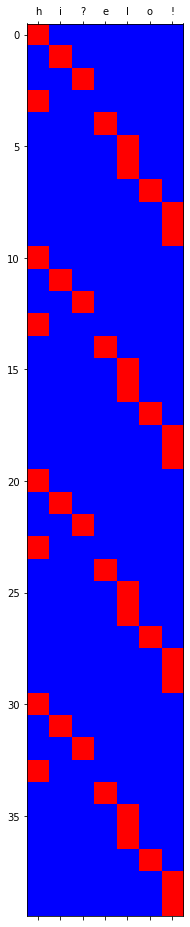

In [21]:
out = linr_h2o(hidden)
yhat = soft(out)
plt.matshow(yhat.to("cpu").data[-40:],cmap="bwr")
plt.xticks(range(7),labels=['h','i','?','e','l','o','!'])

version2 - class안사용

In [22]:
torch.manual_seed(5) 
lstm_cell = torch.nn.LSTMCell(7,8).to("cuda")
linr_h2o = torch.nn.Linear(8,7).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm_cell.parameters())+list(linr_h2o.parameters()),lr=0.1)

In [23]:
T = len(x)
for epoch in range(500):
    h_t = c_t = torch.zeros((1,8)).to("cuda")
    loss = 0 
    ## 1~2
    for t in range(T):
        x_t,y_t = x[[t]].to("cuda"), y[[t]].to("cuda")
        
        ## lstm_cell step1: calculate _ifgo 
        ifgo = x_t @ lstm_cell.weight_ih.T + h_t @ lstm_cell.weight_hh.T + lstm_cell.bias_ih + lstm_cell.bias_hh
        ## lstm_cell step2: decompose _ifgo 
        i_t = sig(ifgo[:,0:8])
        f_t = sig(ifgo[:,8:16])
        g_t = tanh(ifgo[:,16:24])
        o_t = sig(ifgo[:,24:32])
        ## lstm_cell step3: calculate ht,ct 
        c_t = f_t * c_t + i_t * g_t
        h_t = o_t * tanh(c_t)
        
        out = linr_h2o(h_t) 
        #print(o_t.shape,y_t.shape)
        loss = loss + loss_fn(out,y_t)
    loss = loss / T
    if epoch % 100 == 0:
        print(loss)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

tensor(1.8939, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<DivBackward0>)


In [24]:
T = len(x)
hidden = torch.zeros((T,8)).to("cuda")
cell = torch.zeros((T,8)).to("cuda")

h_0 = c_0 = torch.zeros((1,8)).to("cuda") # t = 0일때의 h,c값 초기화
hidden[[0]],cell[[0]] = lstm_cell(x[[0]],(h_0,c_0)) # t = 1일때의 h_1,c_t먼저 기록

for t in range(1,T): #t = 2일때부터 기록
  x_t = x[[t]]
  hidden[[t]],cell[[t]] = lstm_cell(x_t,(hidden[[t-1]],cell[[t-1]]))

([<matplotlib.axis.XTick at 0x7f68d005dfd0>,
 [Text(0, 1, 'h'),
  Text(0, 1, 'i'),
  Text(0, 1, '?'),
  Text(0, 1, 'e'),
  Text(0, 1, 'l'),
  Text(0, 1, 'o'),
  Text(0, 1, '!')])

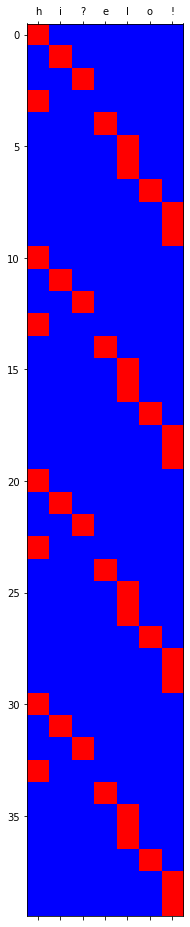

In [25]:
out = linr_h2o(hidden)
yhat = soft(out)
plt.matshow(yhat.to("cpu").data[-40:],cmap="bwr")
plt.xticks(range(7),labels=['h','i','?','e','l','o','!'])


# 2. 다음을 읽고 참 거짓을 판단하여라. (10점)

(1) LSTM은 RNN보다 장기기억에 유리하다. O <br>
(2) torch.nn.Embedding(num_embeddings=2,embedding_dim=1)와 torch.nn.Linear(in_features=1,out_features=1)의 학습가능한 파라메터수는 같다. O <br>
(3) 아래와 같은 네트워크를 고려하자.차원이 (n,1) 인 임의의 텐서에 대하여 net(x)와 net.forword(x)의 출력결과는 같다. O<br>
(4) 아래와 같이 a,b,c,d 가 반복되는 문자열이 반복되는 자료에서 다음문자열을 맞추는 과업을 수행하기 위해서는 반드시 순환신경망의 형태로 설계해야만 한다. O<br>
(5)RNN 혹은 LSTM 으로 신경망을 설계할 시 손실함수는 항상 torch.nn.CrossEntropyLoss 를 사용해야 한다. X<br>
